<a href="https://colab.research.google.com/github/sp-au-mu-nl/PythonMedia/blob/main/notebook/chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap03.zip
!unzip chap03.zip
!rm chap03.zip

--2025-06-26 06:59:47--  https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap03.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap03.zip [following]
--2025-06-26 06:59:48--  https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap03.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31480 (31K) [application/zip]
Saving to: ‘chap03.zip’

chap03.zip          100%[===================>]  30.74K  --.-KB/s    in 0.007s  

2025-06-26 06:59:48 (4.34 MB/s) - ‘chap03.zip’ saved [31480/31480]

Archive:  chap0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import librosa
import IPython

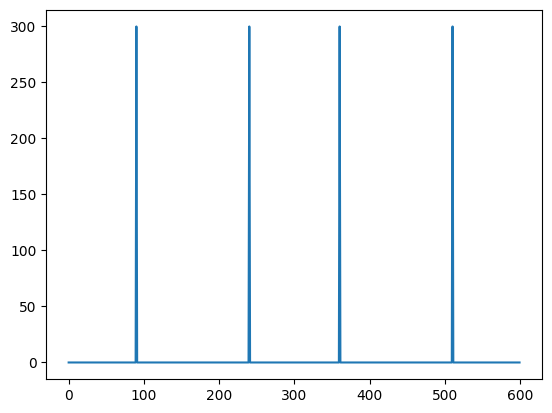

In [3]:
fs=100
t=np.arange(0,7,1/fs)
y=np.sin(2*np.pi*15*t)+np.cos(2*np.pi*40*t)
cs=np.fft.fft(y[:600])
plt.plot(np.abs(cs))

In [4]:
cs.shape

(600,)

In [5]:
np.abs(cs[297:304])

array([1.92702102e-13, 9.98617970e-14, 3.06804307e-13, 1.37223566e-13,
       3.06804307e-13, 9.32976086e-14, 1.92702102e-13])

In [6]:
(np.abs(cs)>250).nonzero()

(array([ 90, 240, 360, 510]),)

In [7]:
cs[90]

np.complex128(-8.020950896805939e-12-300.00000000000017j)

In [8]:
cs[240]

np.complex128(300.00000000000085-6.556020901309991e-12j)

In [9]:
np.angle(cs[np.array([90,240])])

array([-1.57079633e+00, -2.18534030e-14])

In [10]:
np.angle(cs[np.array([90,240])])/np.pi

array([-5.00000000e-01, -6.95615422e-15])

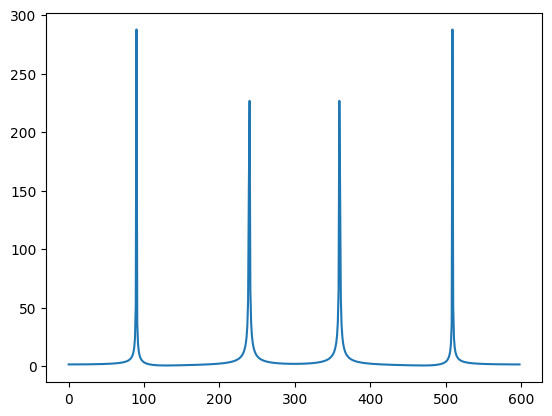

In [11]:
plt.plot(np.abs(np.fft.fft(y[0:599])))

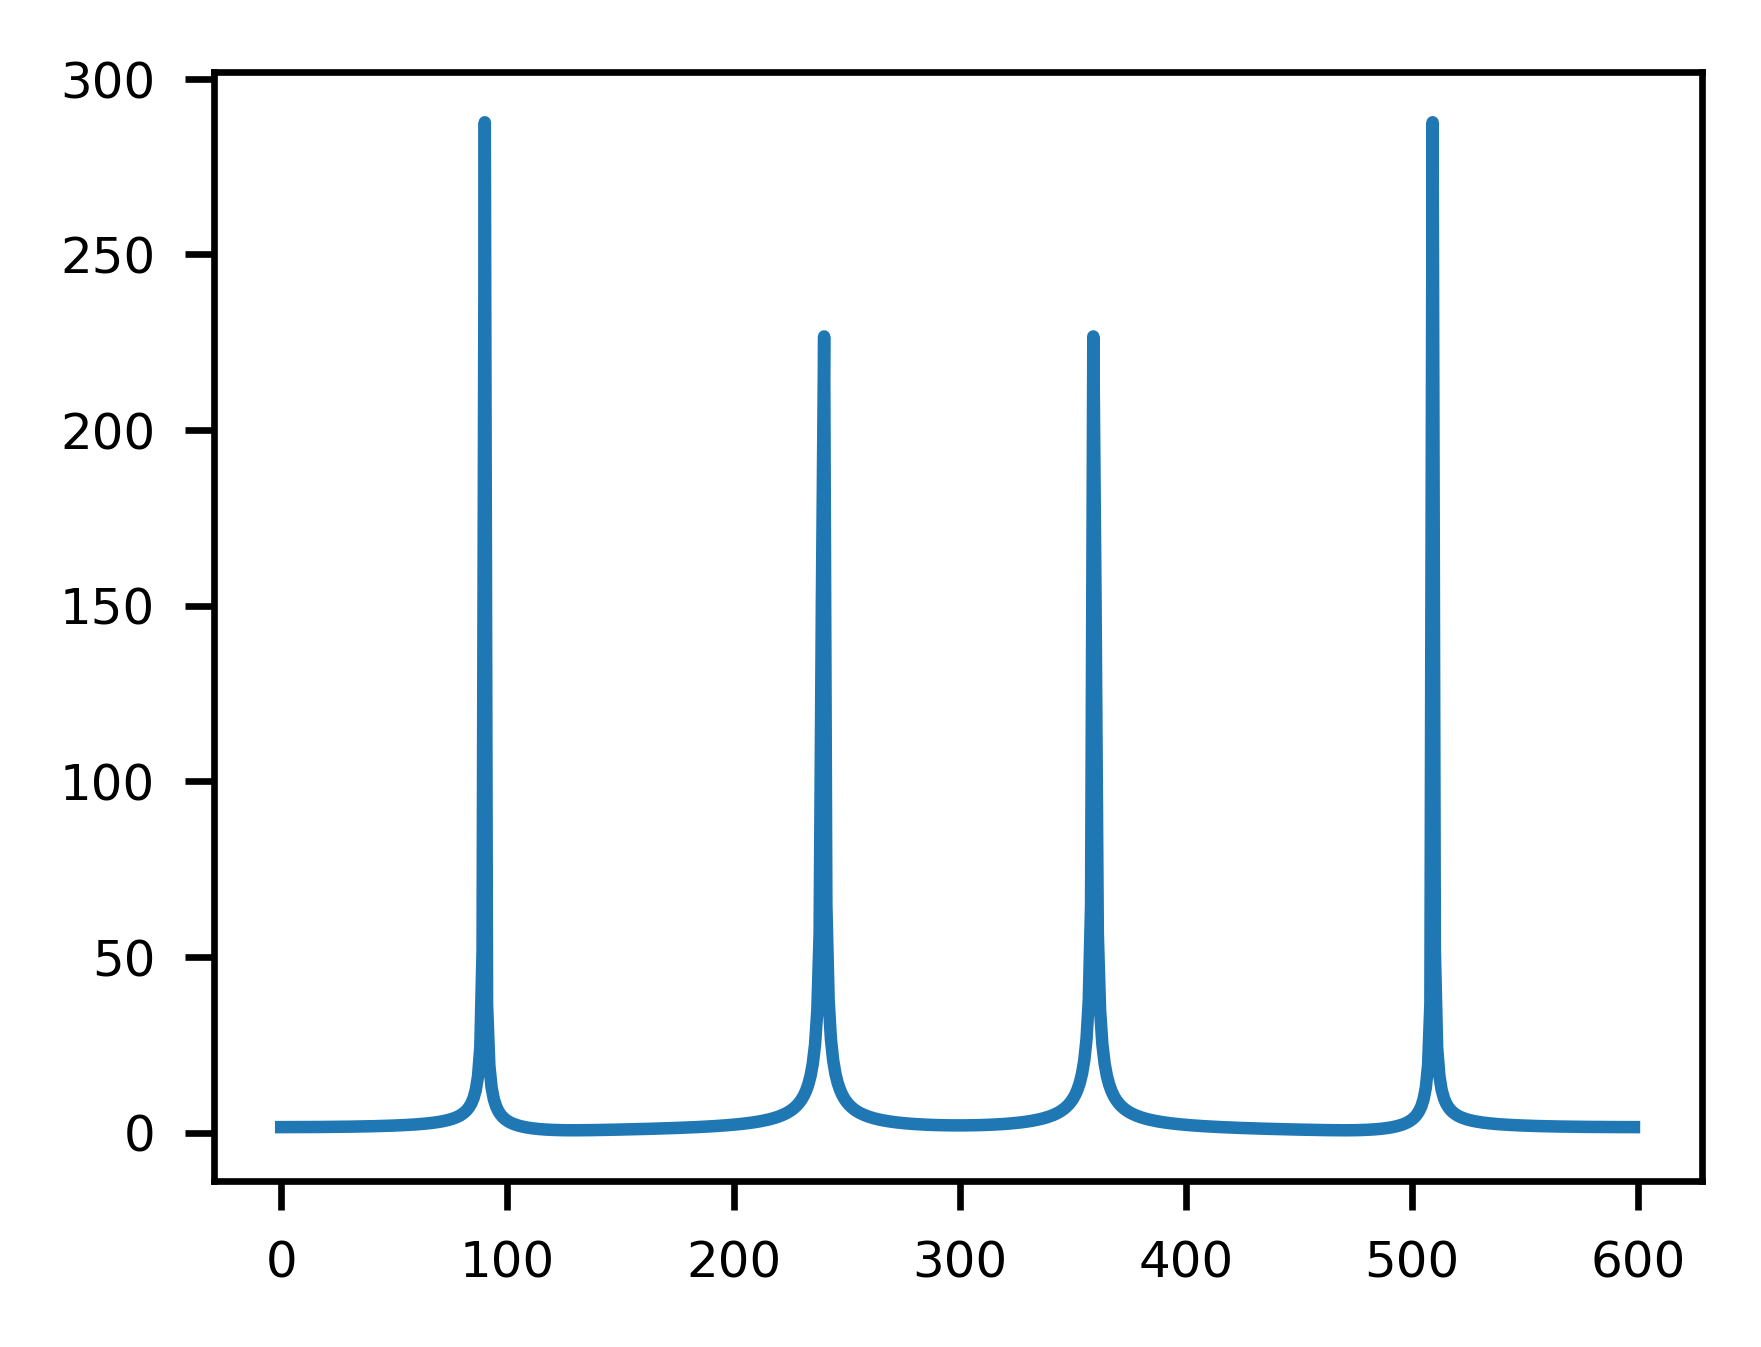

In [12]:
import matplotlib
fig=plt.figure(1,figsize=(3.2,2.4),dpi=600)
matplotlib.rc('font',size=6)
plt.plot(np.abs(np.fft.fft(y[0:599])))
plt.savefig('fig03_02.eps')

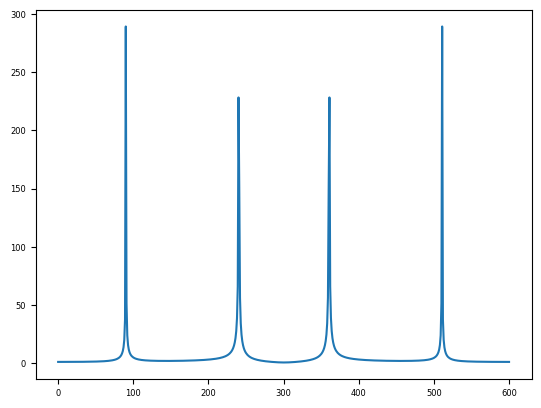

In [13]:
plt.plot(np.abs(np.fft.fft(y[0:601])))

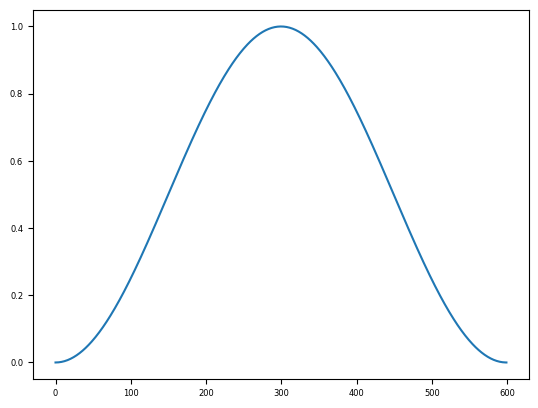

In [14]:
w=np.hanning(600)
plt.plot(w)

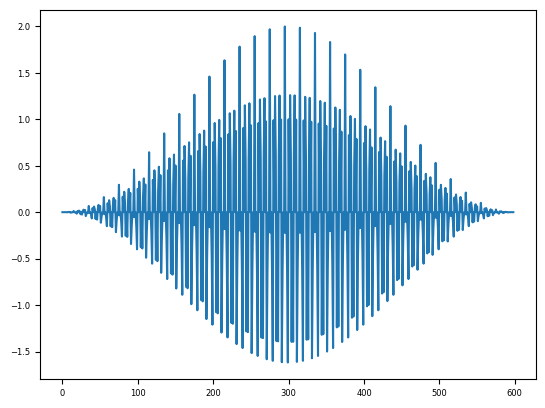

In [15]:
hy=y[:599]*np.hanning(599)
plt.plot(hy)

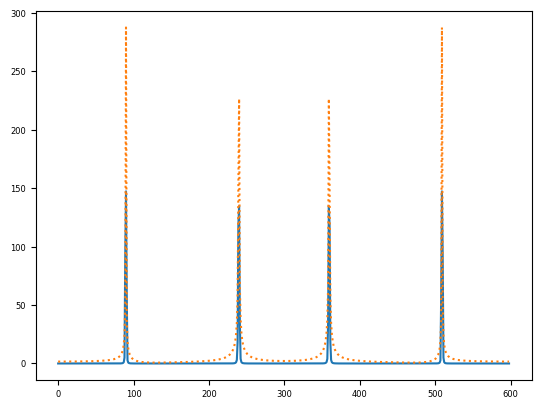

In [16]:
hcs=np.fft.fft(hy)
lcs=np.fft.fft(y[:599])
plt.plot(np.abs(hcs))
plt.plot(np.abs(lcs),':')

In [17]:
#hcs=np.fft.fft(hy)
#x=np.arange(len(hcs))
#lcs=np.fft.fft(y[:599])
#plot=[go.Scatter(x=x,y=np.abs(hcs)),
#      go.Scatter(x=x,y=np.abs(lcs),line={'dash':'dot'})]
#go.Figure(data=plot)

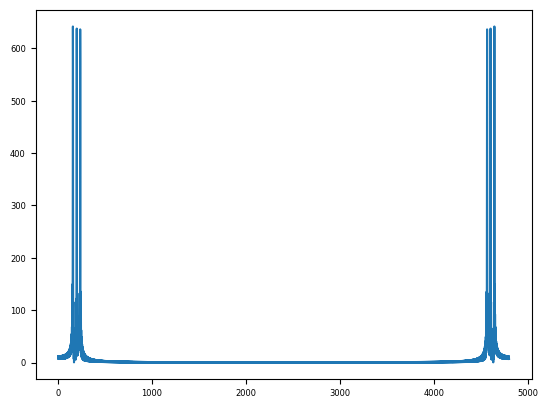

In [18]:
y,fs=librosa.load('domiso.wav',sr=None)
plt.plot(np.abs(np.fft.fft(y)))

(120.0, 260.0)

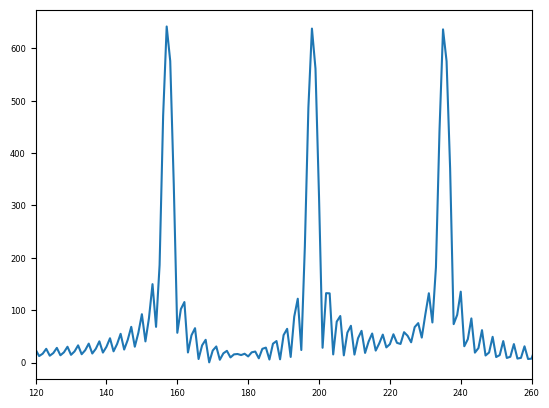

In [19]:
plt.plot(np.abs(np.fft.fft(y)))
plt.xlim(120,260)

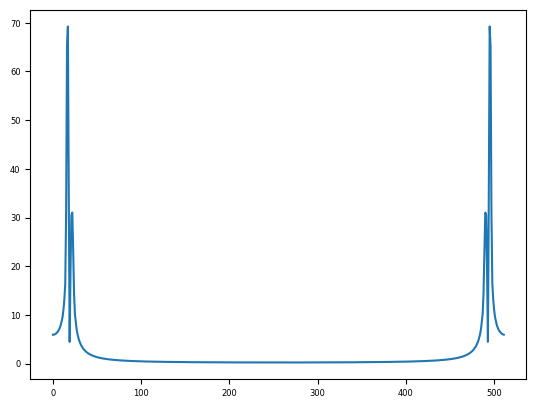

In [20]:
plt.plot(np.abs(np.fft.fft(y[1300:1812]*np.hanning(512))))

(129, 38)

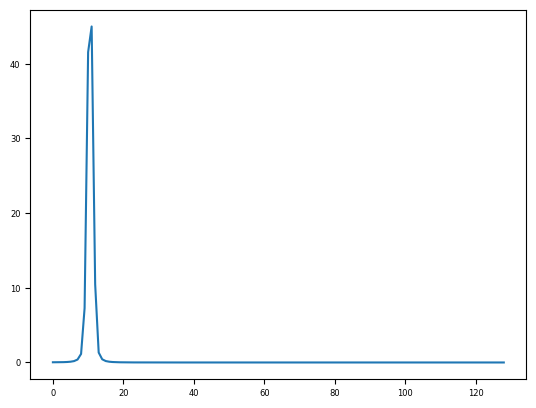

In [21]:
fftlen=256
noverlap=128
S=librosa.stft(y,n_fft=fftlen,hop_length=fftlen-noverlap,
               window=np.hanning(fftlen))
plt.plot(np.abs(S[:,19]))
S.shape

Text(0, 0.5, 'Frequency (Hz)')

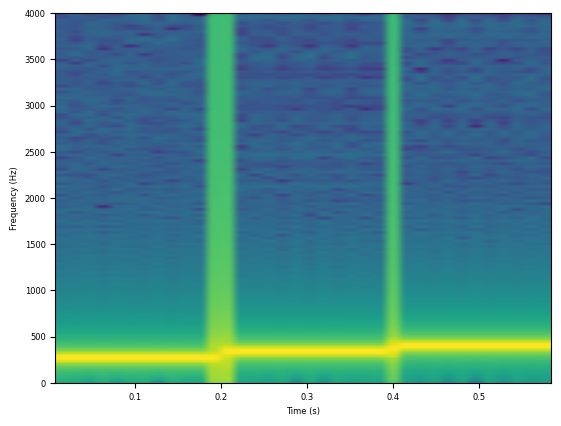

In [22]:
plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

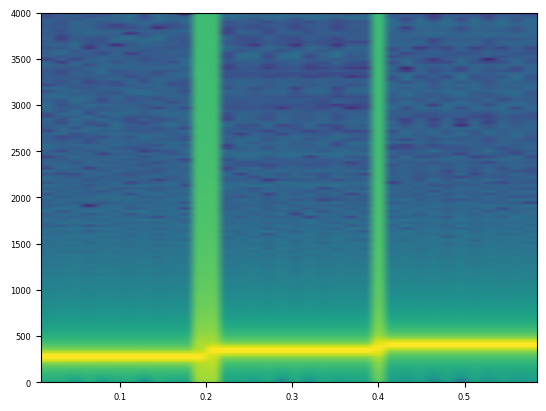

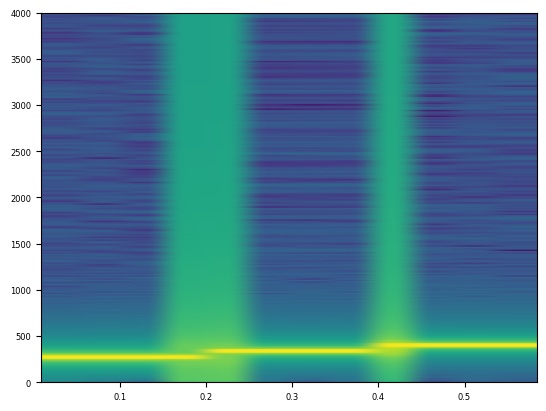

In [23]:
plt.specgram(y,Fs=fs,NFFT=256,window=np.hanning(256),noverlap=128)
plt.figure()
_=plt.specgram(y,Fs=fs,NFFT=512,window=np.hanning(512),noverlap=128)

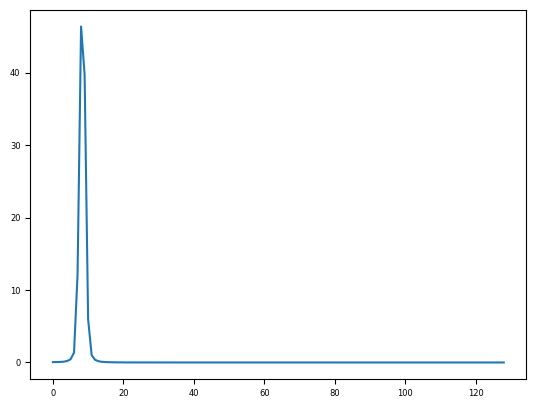

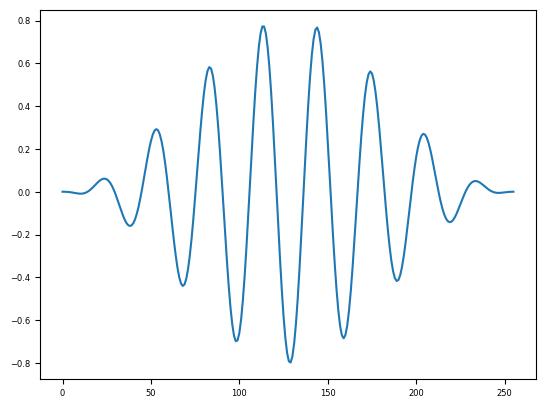

In [24]:
S09=S[:,9]
plt.plot(np.abs(S09))
plt.figure()
plt.plot(np.fft.irfft(S09.T))

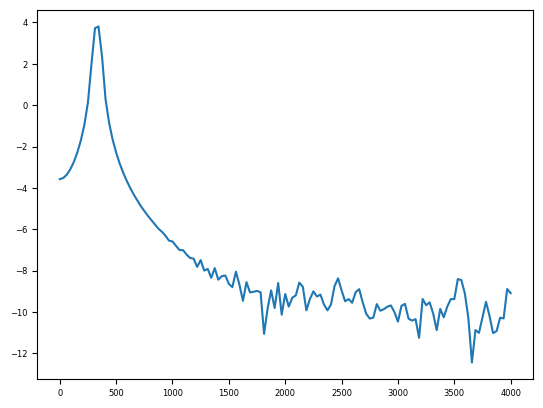

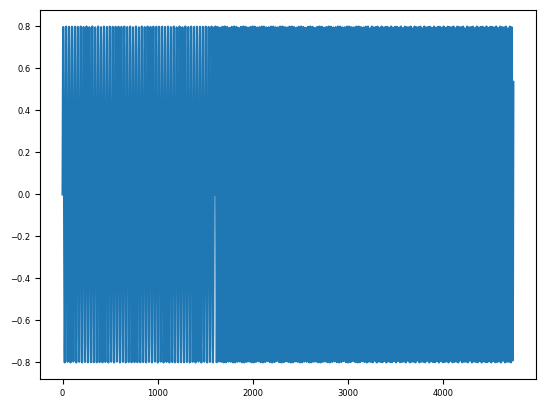

In [25]:
S=librosa.stft(y,n_fft=fftlen,hop_length=fftlen-noverlap,
               window=np.hanning(fftlen))
freq=np.linspace(0,fs/2,S.shape[0])
plt.plot(freq,np.log(np.abs(S[:,19])))
ry=librosa.istft(S,hop_length=fftlen-noverlap,window=np.hanning(fftlen))
plt.figure()
plt.plot(ry)
IPython.display.display(IPython.display.Audio(y,rate=fs))
IPython.display.Audio(ry,rate=fs)

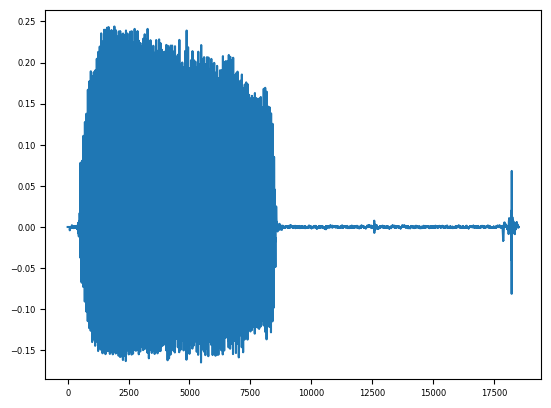

In [26]:
y,fs=librosa.load('a-.wav',sr=None)
plt.plot(y)

np.float64(135.41666666666666)

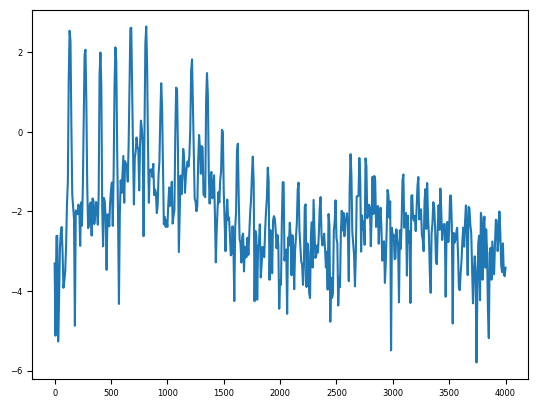

In [27]:
fftsize=2**np.int16(np.ceil(np.log2(fs/10)))
sp=np.log(np.abs(np.fft.fft(y[2000:2000+fftsize]*np.hanning(fftsize))))
plt.plot(np.linspace(0,fs//2,fftsize//2+1),sp[0:fftsize//2+1])
pks=signal.argrelmax(sp,order=10)
pkloc=(pks[0])[(sp[pks]>0).nonzero()[0]]
nharm=10
np.mean(np.diff(pkloc[0:nharm]))*(fs/fftsize)